<a href="https://colab.research.google.com/github/Debayan97531/AI-ML-projects/blob/main/project8_GoldPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [ ]:
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

#Correlation:
      1.Positive
      2.Negative

In [ ]:
correlation=gold_data.corr()

<AxesSubplot:>

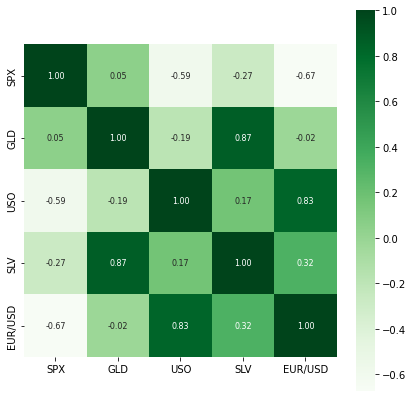

In [ ]:
#consructing a heatmap to understand correlation
plt.figure(figsize=(7,7))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Greens')

In [ ]:
#correlation of values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

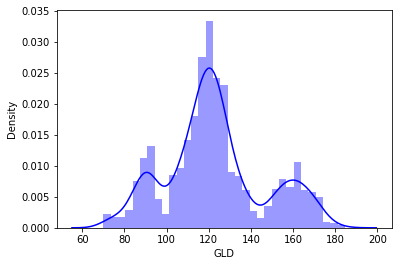

In [ ]:
#checking distribution of GLD Price
sns.distplot(gold_data['GLD'],color='blue')

SPlitting features and target

In [ ]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting data into training and test data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model training:Random Forest Regressor

In [ ]:
regressor= RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evauation

In [ ]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.81649939  81.8242001  116.01550041 127.6177003  120.71870127
 154.74649778 150.27599908 126.12110037 117.50319862 125.93490062
 116.61890089 171.21410064 141.56819903 167.9949993  115.23140005
 117.54150063 140.89860309 170.26020102 159.34570335 160.91839907
 155.0307     125.30560007 175.71299934 157.41460329 125.19370059
  93.88559974  77.91360025 120.77439996 119.13299961 167.43890074
  88.13010095 125.32830049  91.05560069 117.7583002  121.08459951
 136.56180042 115.52610128 115.00740062 148.45599993 107.43600104
 104.43630253  87.16329801 126.56910065 118.01680003 154.06639909
 119.65950024 108.40539999 108.11799849  93.19350046 127.19369749
  75.53490042 113.60369944 121.4703     111.40229902 119.0072988
 120.87899941 159.51589961 167.58800137 146.80309659  85.73869854
  94.45090027  86.79399917  90.61389998 118.84220065 126.41990079
 127.53629998 168.99590076 122.35269966 117.44209898  98.31920048
 168.36670125 143.0577994  131.98350228 121.16310211 120.80859938
 119.712900

In [ ]:
#R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared eror:",error_score)

R squared eror: 0.9893175796343604


Compare actual values and predicted values in a plot

In [ ]:
Y_test = list(Y_test)

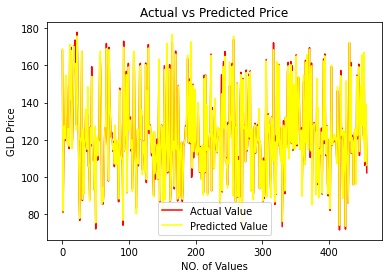

In [ ]:
plt.plot(Y_test,color='red',label='Actual Value')
plt.plot(test_data_prediction,color='yellow',label='Predicted Value')
plt.title("Actual vs Predicted Price")
plt.xlabel("NO. of Values")
plt.ylabel('GLD Price')
plt.legend()